# Author - Nikita Agarwall

# **STOCK MARKET PREDICTION USING TEXTUAL AND NUMERICAL ANALYSIS**
- Create a hybrid model for stock price or performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines. The stock to analyze and predict is SENSEX (S&P BSE SENSEX)

In [68]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
from sklearn.tree import DecisionTreeRegressor
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from google.colab import files
uploaded=files.upload()

Saving ^BSESN.csv to ^BSESN.csv


In [4]:
from google.colab import files
uploaded=files.upload()

Saving india-news-headlines.csv to india-news-headlines.csv


KeyboardInterrupt: ignored

## Step 1 : Importing the Numerical dataset and performing Exploratory Analysis

In [5]:
# Dataframe for exploratory analysis
df=pd.read_csv('^BSESN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0
1,2020-03-17,31611.570313,32047.980469,30394.939453,30579.089844,30579.089844,21500.0
2,2020-03-18,30968.839844,31101.769531,28613.050781,28869.509766,28869.509766,31300.0
3,2020-03-19,27773.359375,29370.529297,26714.460938,28288.230469,28288.230469,33200.0
4,2020-03-20,28460.820313,30418.199219,27932.669922,29915.960938,29915.960938,32100.0


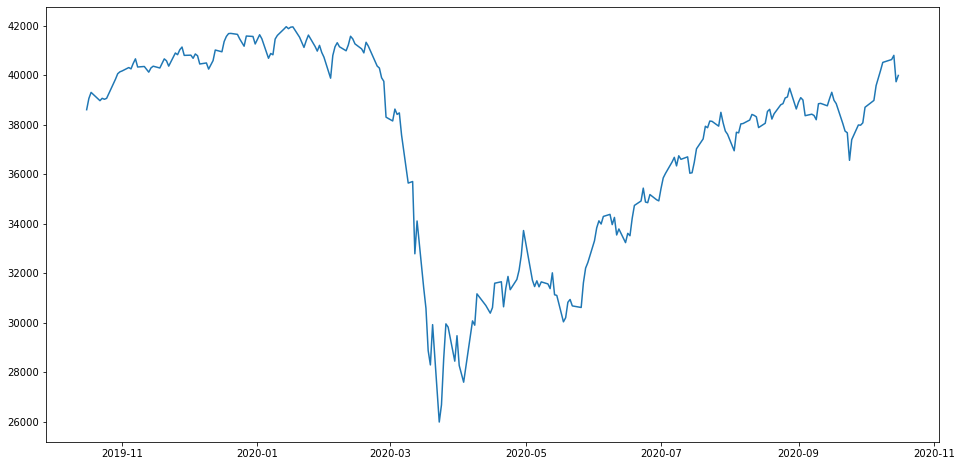

In [ ]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [10]:
# fix random seed for reproducibility
np.random.seed(7)

## Step 2 : Creating a dataframe for storing the Closing stock data per day

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [14]:
df2 = pd.read_csv('^BSESN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## Step 3 : Data Normalization and Division into Training and Test sets

In [15]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [16]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## Step 4 : Creating a LSTM for Numerical Analysis

In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
161/161 - 2s - loss: 0.0693
Epoch 2/100
161/161 - 0s - loss: 0.0115
Epoch 3/100
161/161 - 0s - loss: 0.0084
Epoch 4/100
161/161 - 0s - loss: 0.0053
Epoch 5/100
161/161 - 0s - loss: 0.0032
Epoch 6/100
161/161 - 0s - loss: 0.0019
Epoch 7/100
161/161 - 0s - loss: 0.0012
Epoch 8/100
161/161 - 0s - loss: 9.7361e-04
Epoch 9/100
161/161 - 0s - loss: 8.8901e-04
Epoch 10/100
161/161 - 0s - loss: 9.5292e-04
Epoch 11/100
161/161 - 0s - loss: 8.9437e-04
Epoch 12/100
161/161 - 0s - loss: 9.0122e-04
Epoch 13/100
161/161 - 0s - loss: 9.3773e-04
Epoch 14/100
161/161 - 0s - loss: 9.1204e-04
Epoch 15/100
161/161 - 0s - loss: 9.0601e-04
Epoch 16/100
161/161 - 0s - loss: 9.0736e-04
Epoch 17/100
161/161 - 0s - loss: 9.0785e-04
Epoch 18/100
161/161 - 0s - loss: 9.3262e-04
Epoch 19/100
161/161 - 0s - loss: 8.9364e-04
Epoch 20/100
161/161 - 0s - loss: 9.3103e-04
Epoch 21/100
161/161 - 0s - loss: 8.7979e-04
Epoch 22/100
161/161 - 0s - loss: 9.1380e-04
Epoch 23/100
161/161 - 0s - loss: 8.7639e-04
Ep

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

## Step 5 : Making Predictions

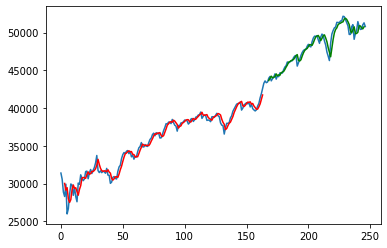

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [20]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")



Root mean square error =  666.9125598562307  RMSE
Root mean square error =  650.5202523364017  RMSE


# Step 6 : Creating a Hybrid model for Numerical and textual Analysis

In [24]:
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('india-news-headlines.csv', names = columns)
news

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
2564383,20170121,sports.cricket.news,Irani Cup: Gandhi ton comes to Gujarat's rescue
2564384,20170121,city.bengaluru,Stress? Techies don't mind it if paycheck is fat
2564385,20170121,sports.cricket.england-in-india-2016,India v England; 3rd ODI; Kolkata: 26 months o...
2564386,20170121,city.mumbai,Patna girl wins TB court battle with help from...


## Step 7 : Text preprocessing

In [25]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2564387 entries, 1 to 2564387
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 58.7+ MB


In [26]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
2564383,1970-01-01 00:00:00.020170121,Irani Cup: Gandhi ton comes to Gujarat's rescue
2564384,1970-01-01 00:00:00.020170121,Stress? Techies don't mind it if paycheck is fat
2564385,1970-01-01 00:00:00.020170121,India v England; 3rd ODI; Kolkata: 26 months o...
2564386,1970-01-01 00:00:00.020170121,Patna girl wins TB court battle with help from...


In [29]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(str(x)))
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

,Date,News
0,2001-01-02 00:00:00.000000000,1 S t a t u s q u o w i l l n ...
1,2001-01-03 00:00:00.000000000,8 7 P o w e r l e s s ...
2,2001-01-04 00:00:00.000000000,1 2 8 T h e s t r i n g t h a t ...
3,2001-01-05 00:00:00.000000000,2 8 1 L i g h t c o m b a t ...
4,2001-01-06 00:00:00.000000000,4 0 7 L i g h t c o m b a t ...
...,...,...
5818,1970-01-01 00:00:00.020170117,2 5 6 1 0 3 3 R e s t a u r a t e u r ...
5819,1970-01-01 00:00:00.020170118,2 5 6 1 7 3 3 C o p s ...
5820,1970-01-01 00:00:00.020170119,2 5 6 2 4 3 2 D e p r e ...
5821,1970-01-01 00:00:00.020170120,2 5 6 3 1 3 2 C M P i n a r a y i ...


In [30]:
news['News']

0       1           S t a t u s   q u o   w i l l   n ...
1       8 7                         P o w e r l e s s ...
2       1 2 8         T h e   s t r i n g   t h a t   ...
3       2 8 1               L i g h t   c o m b a t   ...
4       4 0 7               L i g h t   c o m b a t   ...
                              ...                        
5818    2 5 6 1 0 3 3         R e s t a u r a t e u r ...
5819    2 5 6 1 7 3 3                         C o p s ...
5820    2 5 6 2 4 3 2                       D e p r e ...
5821    2 5 6 3 1 3 2         C M   P i n a r a y i   ...
5822    2 5 6 3 8 3 1                                 ...
Name: News, Length: 5823, dtype: object

## Step 8 : Adding subjectivity and polarity Scores

In [31]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [32]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:00:00.000000000,1 S t a t u s q u o w i l l n ...,1.0,0.05
1,2001-01-03 00:00:00.000000000,8 7 P o w e r l e s s ...,1.0,0.05
2,2001-01-04 00:00:00.000000000,1 2 8 T h e s t r i n g t h a t ...,1.0,0.05
3,2001-01-05 00:00:00.000000000,2 8 1 L i g h t c o m b a t ...,1.0,0.05
4,2001-01-06 00:00:00.000000000,4 0 7 L i g h t c o m b a t ...,1.0,0.05
...,...,...,...,...
5818,1970-01-01 00:00:00.020170117,2 5 6 1 0 3 3 R e s t a u r a t e u r ...,1.0,0.05
5819,1970-01-01 00:00:00.020170118,2 5 6 1 7 3 3 C o p s ...,1.0,-0.10
5820,1970-01-01 00:00:00.020170119,2 5 6 2 4 3 2 D e p r e ...,1.0,0.05
5821,1970-01-01 00:00:00.020170120,2 5 6 3 1 3 2 C M P i n a r a y i ...,1.0,0.05


## Step 9 : Visualizing the polarity and Subjectivity scores

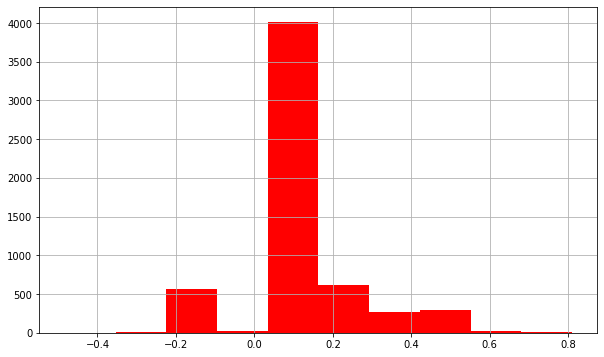

In [35]:
plt.figure(figsize = (10,6))
news['Polarity'].hist(color = 'red')

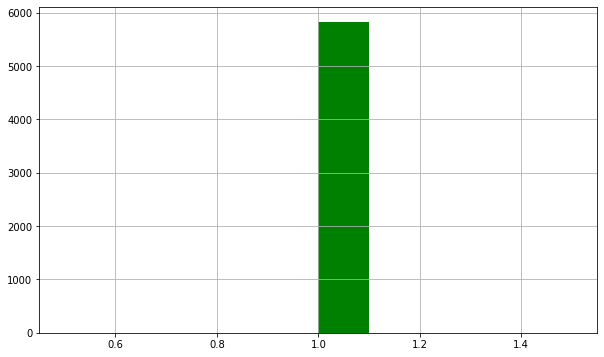

In [36]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'green')

## Step 10 : Performing Sentiment Analysis over the news Headlines

In [37]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,1 S t a t u s q u o w i l l n ...,1.0,0.05,0.0,0.0,0.0,0.0
1,2001-01-03 00:00:00.000000000,8 7 P o w e r l e s s ...,1.0,0.05,0.0,0.0,0.0,0.0
2,2001-01-04 00:00:00.000000000,1 2 8 T h e s t r i n g t h a t ...,1.0,0.05,0.0,0.0,0.0,0.0
3,2001-01-05 00:00:00.000000000,2 8 1 L i g h t c o m b a t ...,1.0,0.05,0.0,0.0,0.0,0.0
4,2001-01-06 00:00:00.000000000,4 0 7 L i g h t c o m b a t ...,1.0,0.05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5818,1970-01-01 00:00:00.020170117,2 5 6 1 0 3 3 R e s t a u r a t e u r ...,1.0,0.05,0.0,0.0,0.0,0.0
5819,1970-01-01 00:00:00.020170118,2 5 6 1 7 3 3 C o p s ...,1.0,-0.10,0.0,0.0,0.0,0.0
5820,1970-01-01 00:00:00.020170119,2 5 6 2 4 3 2 D e p r e ...,1.0,0.05,0.0,0.0,0.0,0.0
5821,1970-01-01 00:00:00.020170120,2 5 6 3 1 3 2 C M P i n a r a y i ...,1.0,0.05,0.0,0.0,0.0,0.0


## Step 11 : Merging the numerical and textual data

In [38]:
merge = news
merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,1 S t a t u s q u o w i l l n ...,1.0,0.05,0.0,0.0,0.0,0.0
1,2001-01-03 00:00:00.000000000,8 7 P o w e r l e s s ...,1.0,0.05,0.0,0.0,0.0,0.0
2,2001-01-04 00:00:00.000000000,1 2 8 T h e s t r i n g t h a t ...,1.0,0.05,0.0,0.0,0.0,0.0
3,2001-01-05 00:00:00.000000000,2 8 1 L i g h t c o m b a t ...,1.0,0.05,0.0,0.0,0.0,0.0
4,2001-01-06 00:00:00.000000000,4 0 7 L i g h t c o m b a t ...,1.0,0.05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5818,1970-01-01 00:00:00.020170117,2 5 6 1 0 3 3 R e s t a u r a t e u r ...,1.0,0.05,0.0,0.0,0.0,0.0
5819,1970-01-01 00:00:00.020170118,2 5 6 1 7 3 3 C o p s ...,1.0,-0.10,0.0,0.0,0.0,0.0
5820,1970-01-01 00:00:00.020170119,2 5 6 2 4 3 2 D e p r e ...,1.0,0.05,0.0,0.0,0.0,0.0
5821,1970-01-01 00:00:00.020170120,2 5 6 3 1 3 2 C M P i n a r a y i ...,1.0,0.05,0.0,0.0,0.0,0.0


In [39]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1.0,0.05,0.0,0.0,0.0,0.0
1,1.0,0.05,0.0,0.0,0.0,0.0
2,1.0,0.05,0.0,0.0,0.0,0.0
3,1.0,0.05,0.0,0.0,0.0,0.0
4,1.0,0.05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5818,1.0,0.05,0.0,0.0,0.0,0.0
5819,1.0,-0.10,0.0,0.0,0.0,0.0
5820,1.0,0.05,0.0,0.0,0.0,0.0
5821,1.0,0.05,0.0,0.0,0.0,0.0


In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.0,0.412371,0.0,0.0,0.0,0.0
1,0.0,0.412371,0.0,0.0,0.0,0.0
2,0.0,0.412371,0.0,0.0,0.0,0.0
3,0.0,0.412371,0.0,0.0,0.0,0.0
4,0.0,0.412371,0.0,0.0,0.0,0.0


In [52]:
X = new_df[0:249]
y =df['Close']

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(199, 6)

In [54]:
y_train.shape

(199,)

In [43]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
108,0.0,0.412371,0.0,0.0,0.0,0.0
18,0.0,0.417204,0.0,0.0,0.0,0.0
205,0.0,0.412371,0.0,0.0,0.0,0.0
15,0.0,0.596005,0.0,0.0,0.0,0.0
71,0.0,0.417204,0.0,0.0,0.0,0.0
7,0.0,0.412371,0.0,0.0,0.0,0.0
228,0.0,0.586340,0.0,0.0,0.0,0.0
180,0.0,0.412371,0.0,0.0,0.0,0.0
146,0.0,0.412371,0.0,0.0,0.0,0.0
160,0.0,0.412371,0.0,0.0,0.0,0.0


## Step 12 : Training a Random Forest Regressor

In [57]:
x_train.fillna(x_train.mean(),inplace=True)
x_test.fillna(x_test.mean(),inplace=True)
y_train.fillna(y_train.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [58]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [62]:
y_test.fillna(y_test.mean(),inplace=True)

In [63]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

[39794.10116176 48061.42545407 39794.10116176 39794.10116176
 35157.31777525 39794.10116176 39794.10116176 39794.10116176
 39794.10116176 39794.10116176]
248    50792.078125
168    40303.664860
76     36329.011719
150    40707.308594
145    40794.738281
73     36021.421875
45     30609.300781
159    40261.128906
218    46874.359375
213    49792.121094
Name: Close, dtype: float64
Root mean square error =  6558.393009179389  RMSE


#AdaBoostRegressor

In [77]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [78]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  6534.979344921796  RMSE


# DecisionTreeRegressor Model

In [79]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [80]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

[39873.36929081 48002.68932307 39873.36929081 39873.36929081
 33780.890625   39873.36929081 39873.36929081 39873.36929081
 39873.36929081 39873.36929081]
248    50792.078125
168    40303.664860
76     36329.011719
150    40707.308594
145    40794.738281
73     36021.421875
45     30609.300781
159    40261.128906
218    46874.359375
213    49792.121094
Name: Close, dtype: float64
Mean Squared error:  42232621.5530156


In [81]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  6498.663058892621  RMSE


# AdaBoostRegressor Model

In [82]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [83]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

42963554.90879095


In [84]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  6554.659023075949  RMSE


# LGBMRegressor Model

In [85]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [86]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

46789836.23593566


In [87]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  6840.309659360142  RMSE


# XGBRegressor Model

In [88]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[20:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [89]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

41374973.85758124


In [90]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  6432.338133026065  RMSE


# Conclusion

- RandomForest = 6558.393009179389
- DecisionTree = 6498.663058892621
- AdaBoost = 6554.659023075949
- LightGBM = 6840.309659360142
- XGBoost =  6432.338133026065<br>
From here we can see that XGBoostRegressor shows a better performance than the others.

>However, both the models(RandomForest and AdaBoost) have very high RMSE values. The reason for high values is the unpredictible nature of the stock prices.

### TASK ACCOMPLISHED

>I was able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.


> THANK YOU!😀

